# BIOS512 Assignment #4

Import the 📈Tidyverse into your `R` session

In [98]:
library('tidyverse')
library('ggrepel')
library('scales')

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [99]:
schoolVax = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv", col_types = cols())
head(schoolVax)

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fraction of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [100]:
df_vacc_rates = schoolVax |>
    filter(mmr >= 0) |>
    group_by(state) |>
    summarize(mmr95 = sum(mmr >= 95, na.rm = T)/n())

head(df_vacc_rates)

state,mmr95
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [279]:
df_vacc_rates |> arrange(mmr95) |> head(1)

state,mmr95
<chr>,<dbl>
Arkansas,0.003527337


*Arkansas has the lowest proportion of schools with MMR vaccination rate of at least 95%*

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [167]:

vax_nc = schoolVax |>
    filter(overall >= 0, state == "North Carolina") |>
    arrange(overall) |>
    mutate(rank = row_number(), cum_percent = 100*rank/n())




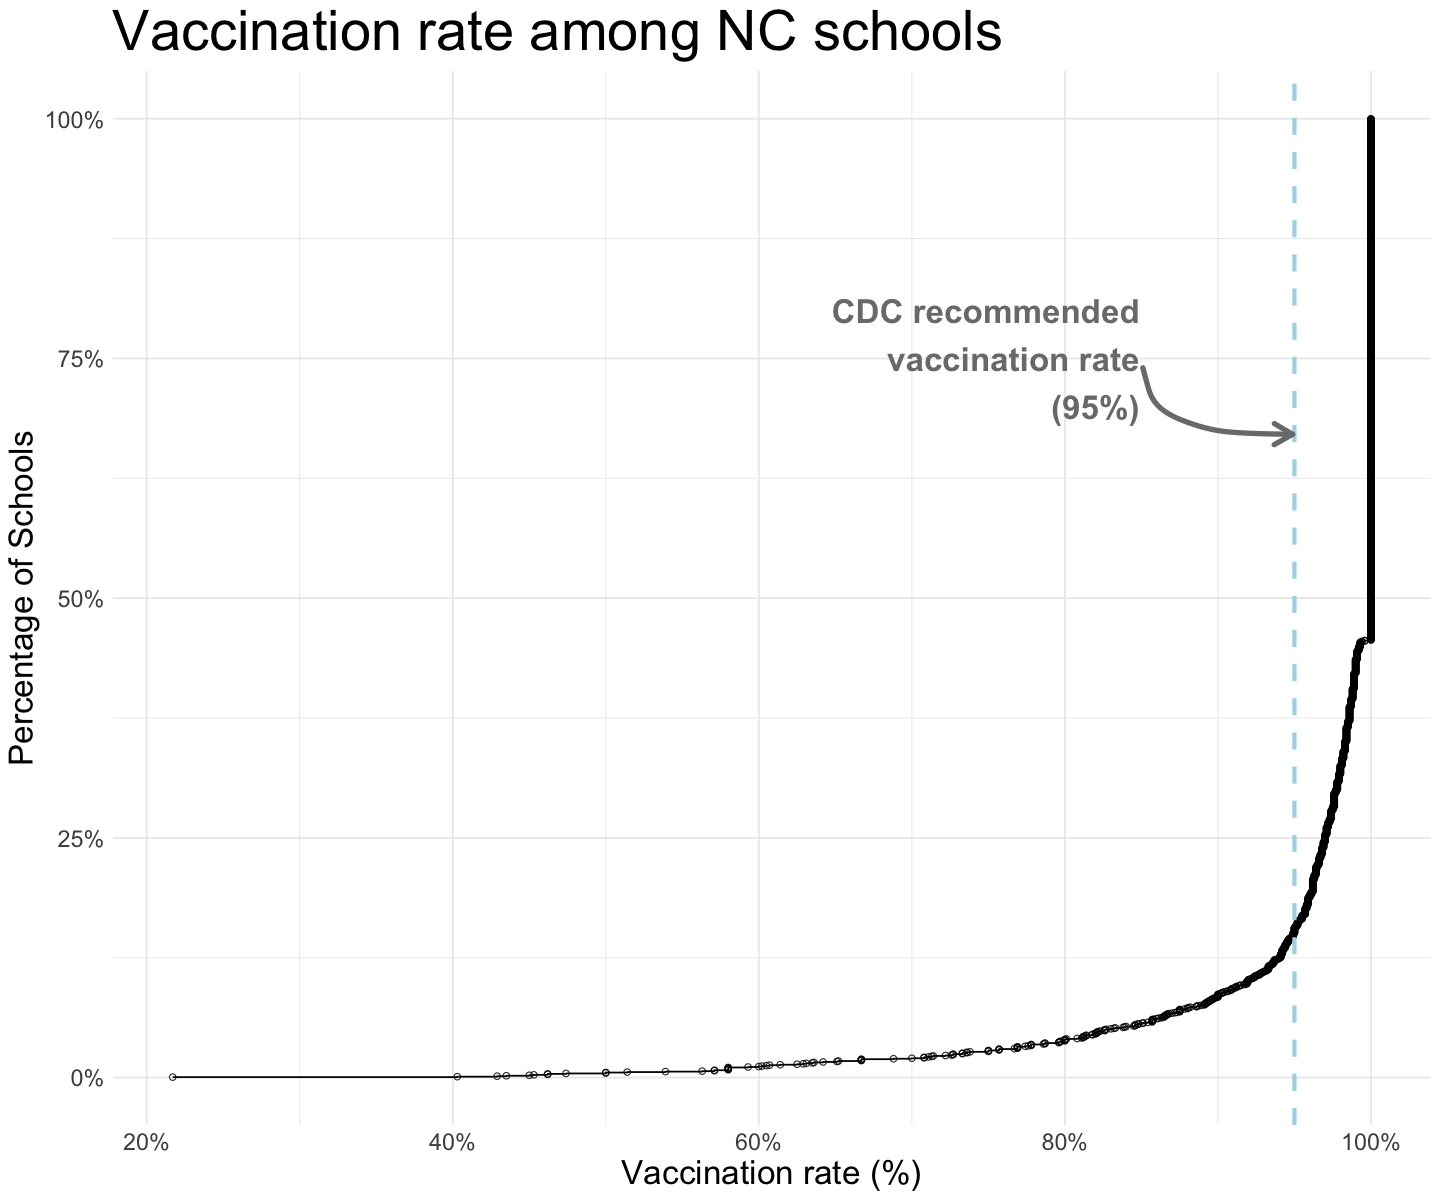

In [278]:
options(repr.plot.width=12, repr.plot.height=10)

ggplot(vax_nc, aes(x = overall, y=cum_percent)) + 
    geom_step(size=.5) +
    geom_point(shape=1, alpha=.8) + 
    geom_vline(mapping = aes(xintercept = 95), color = "lightblue", size = 1.2, linetype = "dashed" ) +
    #annotate("text", label = "CDC recommended\n vaccination rate (95%)", x = 80, y = 75, size = 7) --> adds label with standard ggplot but can't customize as much
    geom_text_repel(
        # specify coordinate for text label to point to
        data = data.frame(x = c(95),y = c(67)),
        mapping = aes(x,y),
        size = 7,
        fontface = "bold",
        color = "#7b7b7b",
        label = "CDC recommended\n vaccination rate\n (95%)",
        # right align text, but goes all the way to right of plot
        hjust = "right",
        # shift text to left (increase magnitude of shift if use hjust to right)
        nudge_x = -25,
        box.padding = 9.5,
        # shift text up
        nudge_y = 10,
        segment.curvature = .5,
        segment.ncp = 1,
        segment.angle = 60,
        segment.size = 1.5,
        arrow = arrow(length = unit(0.02, "npc"))
    ) +
    labs(x = "Vaccination rate (%)", y = "Percentage of Schools", title = "Vaccination rate among NC schools") +
    scale_x_continuous(labels = number_format(suffix="%")) + 
    scale_y_continuous(labels = number_format(suffix="%")) +
    theme_minimal() +
    theme(axis.title = element_text(size = 20), axis.text = element_text(size = 14), title = element_text(size=28))
    

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

# ![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [ ]:
vax_nc |> summarize(median_rate = median(overall))

median_rate
<dbl>
100


*The median overall vaccination rate among North Carolina schools is 100%, above the CDC recommendation of 95%*